<a href="https://colab.research.google.com/github/onuoha/-Inverted-Pendulum-by-a-Data-driven-Approach/blob/main/Copy_of_artificial_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [28]:
# Verify the Tensorflow version
tf.__version__

'2.8.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [29]:
data = pd.read_excel('Folds5x2_pp.xlsx')
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [30]:
print(x)
print(y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [31]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Splitting the dataset into the Training set and Test set

In [32]:
from sklearn.model_selection import train_test_split
#Matrix features of the training set and test set => x, and the dependent variable of the training and test set => y
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)


## Part 2 - Building the ANN

### Initializing the ANN

ANN Diagram

## 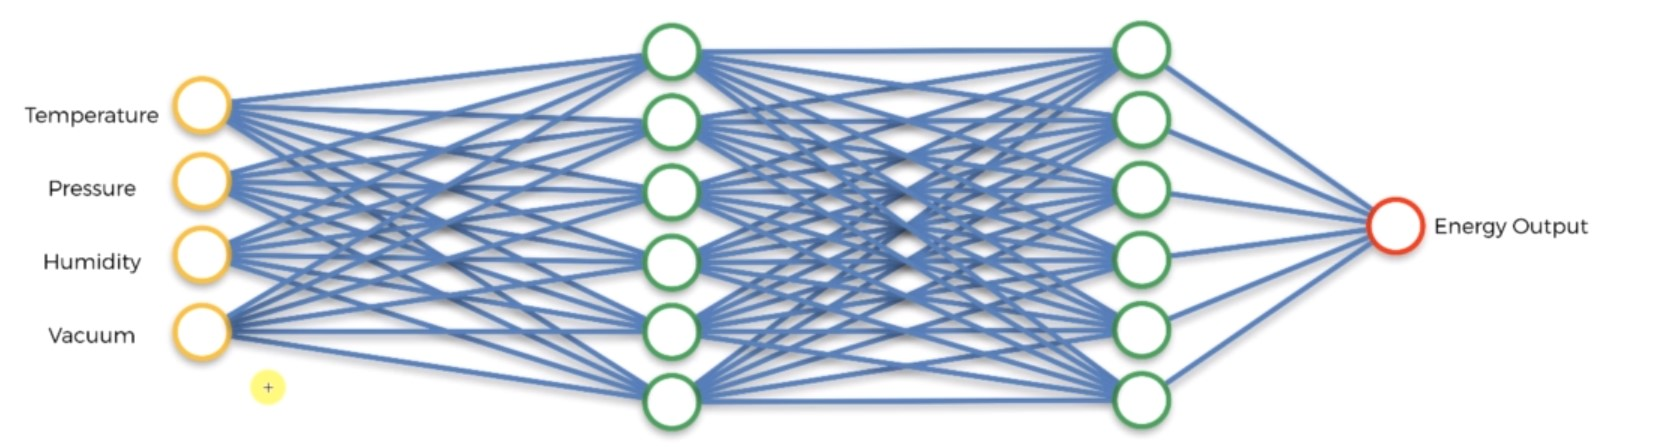

In [33]:
# Tensorflow is a deep learning library used for building neural networks
# Creating the object of the sequential class
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [34]:
# The Dense class is the connection between the input layer and the first hidden layer.
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [35]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [36]:
# Sigmoid (for classification with 2 categories) or softmax (more than 2 categories) is used for classification and for Regression with a continuos output, choose none.
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

The prediction will be compared to the real energy output of the training set which will yield a loss which is the squared difference between the predicted energy output and the real energy output. The prediction comes in two batches so the sum of squared difference btn the predicted energy output and the real energy o/p can be computed. This yields a loss. Therefore, backward propagation is applied and stochastic gradient descent is applied to this optimizer to reduce the loss.

### Compiling the ANN

In [37]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [38]:
#from tensorflow.python.ops.gen_batch_ops import batch
# The gradient descent happens on several epochs. On each epochs the losses reduce.
ann.fit(x_train, y_train, batch_size=32, epochs = 100)


Epoch 1/100
240/240 [==============================] - 1s 2ms/step - loss: 50940.1562
Epoch 2/100
240/240 [==============================] - 0s 2ms/step - loss: 405.9844
Epoch 3/100
240/240 [==============================] - 0s 2ms/step - loss: 349.1390
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 316.0993
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 276.6129
Epoch 6/100
240/240 [==============================] - 0s 2ms/step - loss: 231.9200
Epoch 7/100
240/240 [==============================] - 0s 2ms/step - loss: 188.6629
Epoch 8/100
240/240 [==============================] - 0s 2ms/step - loss: 149.1857
Epoch 9/100
240/240 [==============================] - 0s 1ms/step - loss: 120.1378
Epoch 10/100
240/240 [==============================] - 0s 2ms/step - loss: 100.4552
Epoch 11/100
240/240 [==============================] - 0s 1ms/step - loss: 82.9865
Epoch 12/100
240/240 [==============================] - 0s 2ms/step - los

### Predicting the results of the Test set

In [39]:
y_pred = ann.predict(x_test)
np.set_printoptions(precision=2)
# Recall y as printed is horizontal to reshape it vertical
y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) #1 for vertical and 0 for horizontal

[[432.28 431.23]
 [463.21 460.01]
 [466.69 461.14]
 ...
 [473.9  473.26]
 [440.78 438.  ]
 [459.91 463.28]]
